In [69]:
import numpy as np, matplotlib.pyplot as plt
from sympy import oo, Matrix, lambdify, Rational, simplify
from sympy.abc import x,y,t
from sympy.tensor import derive_by_array
from scipy.optimize import minimize

In [2]:
plt.xkcd();

In [3]:
xx = np.linspace(-2,3.5)
yy = np.linspace(-2,2.5)
X,Y = np.meshgrid(xx,yy)

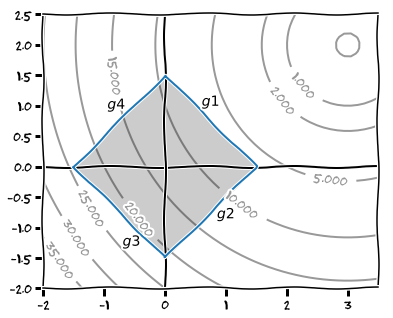

In [4]:
plt.figure(figsize=(6,6))
plt.axes(aspect='equal')
plt.axhline(color='k')
plt.axvline(color='k')
plt.xlim(-2,3.5)
plt.ylim(-2,2.5)
plt.plot([-3/2, 0, 3/2, 0, -3/2],[0,3/2,0,-3/2, 0])
plt.fill_between([ -1.5,    0,  1.5],
                [    0, -1.5,    0],
                [    0,  1.5,    0],
                color='.8')
CS = plt.contour(X,Y,(X-3)**2+(Y-2)**2, colors='k', alpha=0.4,
                levels = [0.04,1,2,5,10,15,20,25,30,35])
plt.clabel(CS)
plt.text(0.6,1,'$g1$')
plt.text(0.85,-0.85,'$g2$')
plt.text(-0.7,-1.3,'$g3$')
plt.text(-0.95,0.95,'$g4$')
plt.show()

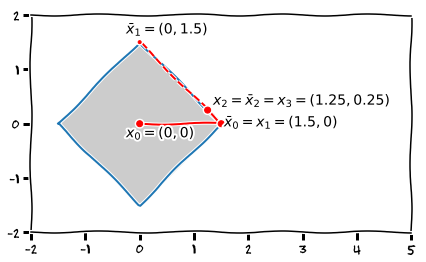

In [100]:
plt.figure(figsize=(7,4))
plt.axes(aspect='equal')
# plt.axhline(color='k')
# plt.axvline(color='k')
plt.xlim(-2,5)
plt.ylim(-2,2)
plt.plot([-3/2, 0, 3/2, 0, -3/2],[0,3/2,0,-3/2, 0])
plt.fill_between([ -1.5,    0,  1.5],
                [    0, -1.5,    0],
                [    0,  1.5,    0],
                color='.8')
plt.text(-0.25,-0.25,'$x_0=(0,0)$')
plt.text(1.55,-0.05,'$\\bar{x}_0=x_1=(1.5,0)$')
plt.text(1.35,0.35,'$x_2=\\bar{x}_2=x_3=(1.25,0.25)$')
plt.text(-0.25, 1.66,'$\\bar{x}_1=(0,1.5)$')
plt.plot([1.5, 0],[0,1.5],'r--.')
plt.plot([0,1.5,1.25],[0,0,0.25],'r-o')
plt.show()

In [16]:
def constraint(x):
    return np.atleast_1d(1.5 - np.sum(np.abs(x)))

In [17]:
minimize(lambda x: (x[0]-3)**2+(x[1]-2)**2,[0,0],constraints={"fun": constraint, "type": "ineq"})

     fun: 6.124999999999993
     jac: array([-3.49999988, -3.50000012])
 message: 'Optimization terminated successfully.'
    nfev: 25
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([ 1.25000005,  0.24999995])

In [41]:
minimize(lambda x: -3*(x[0]-1.5)-4*x[1], [1.5,0], constraints={"fun": constraint, "type": "ineq"})

     fun: -1.499998863774982
     jac: array([-3., -4.])
 message: 'Optimization terminated successfully.'
    nfev: 98
     nit: 18
    njev: 18
  status: 0
 success: True
       x: array([  1.13621952e-06,   1.49999886e+00])

In [21]:
derive_by_array((x-3)**2+(y-2)**2,[x,y]).subs({x:0,y:3/2})

[-6, -1.00000000000000]

In [40]:
f = (x-3)**2 + (y-2)**2
derive_by_array(f,[x,y]).subs({x:Rational(3,2),y:0})

[-3, -4]

In [48]:
f.subs({x:Rational(3,2),y:0})

25/4

In [65]:
L1 = (Matrix(1,2,derive_by_array(f,[x,y]).subs({x:Rational(3,2),y:0}))*Matrix(2,1,[x-Rational(3,2),y-0]))[0]+f.subs({x:Rational(3,2),y:0})

In [70]:
simplify(f.subs({x:Rational(3,2)*(1-t), y:Rational(3,2)*t}))

9*t**2/2 - 3*t/2 + 25/4

In [84]:
L2 = (Matrix(1,2,derive_by_array(f,[x,y]).subs({x:Rational(5,4),y:Rational(1,4)}))*Matrix(2,1,[x-Rational(5,4),y-Rational(1,4)]))[0]+f.subs({x:Rational(5,4),y:Rational(1,4)})

In [86]:
L2

-7*x/2 - 7*y/2 + 91/8

In [87]:
f.subs({x:Rational(5,4), y:Rational(1,4)})

49/8

In [88]:
minimize(lambda x: -7*x[0]/2-7*x[1]/2, [5/4,1/4], constraints={"fun": constraint, "type": "ineq"})

     fun: -5.25
     jac: array([-3.5, -3.5])
 message: 'Optimization terminated successfully.'
    nfev: 4
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([ 1.25,  0.25])

In [90]:
L2.subs({x:Rational(5,4), y:Rational(1,4)})

49/8

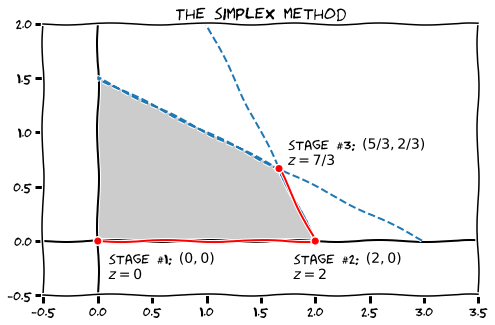

In [157]:
plt.figure(figsize=(8,5))
plt.axes(aspect='equal')
plt.axhline(color='k')
plt.axvline(color='k')
plt.xlim(-0.5,3.5)
plt.ylim(-0.5,2)
plt.plot([0,2,5/3,0,3],[4,0,2/3,3/2,0],'--')
# plt.plot([0,3],[3/2,0],'--')
plt.fill_between([0,5/3,2],[0,0,0],[3/2,2/3,0], color='.8')
plt.plot([0,2,5/3],[0,0,2/3], 'r-o')
plt.text(0.1,-0.2,'stage #1: $(0,0)$')
plt.text(0.1,-0.35,'$z=0$')
plt.text(1.8,-0.2, 'stage #2: $(2,0)$')
plt.text(1.8,-0.35,'$z=2$')
plt.text(1.75,0.85, 'stage #3: $(5/3, 2/3)$')
plt.text(1.75,0.7, '$z=7/3$')
plt.title('The simplex method')
plt.show()